In [1]:
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

### Load data

Demand

In [2]:
aus_demand = pd.read_csv(
    "/g/data/w42/dr6273/work/projects/Aus_energy/data/energy_demand/daily_demand_20091201-20210130.csv",
    index_col=0,
    parse_dates=True
)

In [3]:
aus_demand = aus_demand.loc[slice("2010", "2020")]

Add a new NEM column

In [4]:
aus_demand["NEM"] = aus_demand.sum(axis=1)

In [10]:
aus_demand = xr.DataArray(
    aus_demand.T,
    dims=["region", "time"],
    coords={"region": aus_demand.columns, "time": aus_demand.index.values}
)

Temperature

In [5]:
t2m = xr.open_mfdataset(
    "/g/data/w42/dr6273/work/projects/Aus_energy/demand_predictors/2t_era5_daily_1940-2023_NEM_pop_dens_mask.nc"
)

In [6]:
t2m = t2m.sel(time=slice("2000", "2020")).t2m

In [7]:
# t2m["time"] = aus_demand.index.values

In [8]:
t2m = t2m.compute()

In [9]:
t2m

<xarray.DataArray 't2m' (time: 7671, region: 6)> Size: 368kB
array([[290.9143782 , 290.90674127, 287.76883594, 295.84149538,
        288.17186291, 286.89697931],
       [292.49287889, 291.46568436, 291.22297863, 296.21474212,
        292.15691873, 288.28164294],
       [293.84472967, 294.76055866, 291.97141515, 295.91056867,
        290.79161704, 289.16777021],
       ...,
       [292.72959946, 292.19627535, 289.67451571, 298.28041044,
        290.7897073 , 287.92992945],
       [293.15940777, 293.2520696 , 290.94464763, 296.44004557,
        292.38204592, 288.27281073],
       [293.73860457, 293.35611338, 291.79369594, 297.55807982,
        293.10870726, 287.51951644]])
Coordinates:
  * time     (time) datetime64[ns] 61kB 2000-01-01 2000-01-02 ... 2020-12-31
  * region   (region) <U3 72B 'NEM' 'NSW' 'VIC' 'QLD' 'SA' 'TAS'

#### Time series

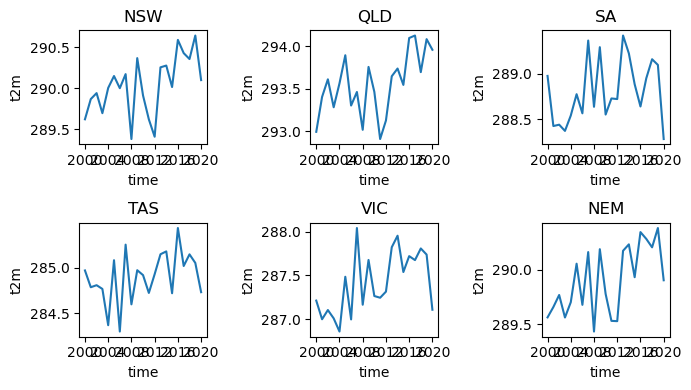

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(7, 4))

for i, r in enumerate(aus_demand.region.values):
    t2m.sel(region=r).resample(time="1YS").mean().plot(ax=ax.flatten()[i])
    ax.flatten()[i].set_title(r)
    
plt.tight_layout()

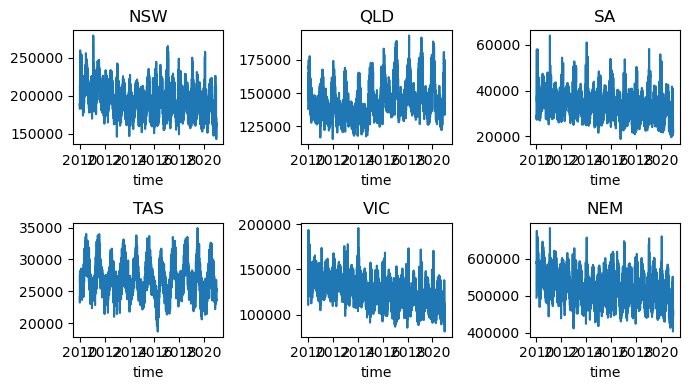

In [48]:
fig, ax = plt.subplots(2, 3, figsize=(7, 4))

for i, r in enumerate(aus_demand.region.values):
    aus_demand.sel(region=r).plot(ax=ax.flatten()[i])
    ax.flatten()[i].set_title(r)
    
plt.tight_layout()

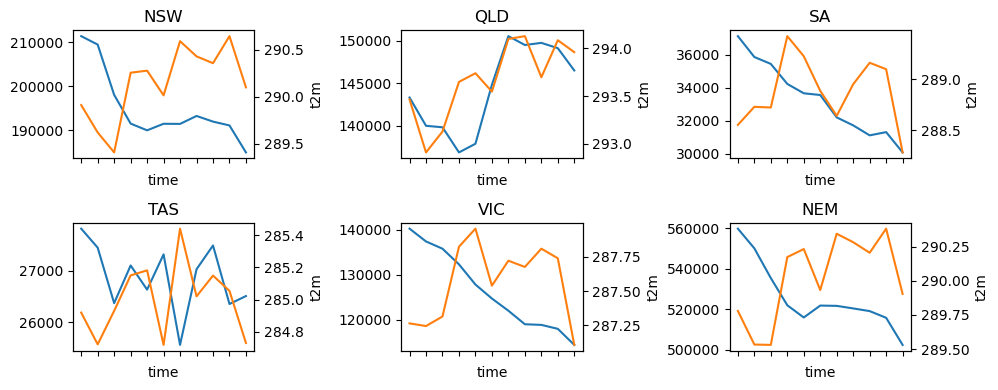

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(10, 4))

for i, r in enumerate(aus_demand.region.values):
    aus_demand.sel(region=r).resample(time="1YS").mean().plot(ax=ax.flatten()[i])
    ax.flatten()[i].set_title(r)
    
    ax2 = ax.flatten()[i].twinx()
    t2m.sel(region=r).resample(time="1YS").mean().plot(ax=ax2, color="tab:orange", zorder=1)
    ax2.set_title("")
    ax2.set_xticklabels([])
    ax2.set_xlabel("")
    
plt.tight_layout()

In [ ]:
aus_demand